### 15. use this dataset and answer the following questions

 https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv  

1. Take the passenger name column from the dataset and re-construct the column as first name, middle name and last name.
2. Use any three string columns and create a cross tab view and generate a heatmap for the same.

In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('Data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [9]:
# 1. Extract Last_Name
# Splits by comma and takes the first element
df['Last_Name'] = df['Name'].str.split(',').str[0]

# 2. Extract the full first/middle name
# We prioritize the name in parentheses (e.g., for Mrs. Cumings)
# r'\((.*?)\)' finds and captures text inside parentheses.
parentheses_name = df['Name'].str.extract(r'\((.*?)\)')

# As a fallback, we extract the name after the title
# r'\w+\.\s(.*)' finds a title (like 'Mr.') and captures everything after it.
after_title_name = df['Name'].str.extract(r'\w+\.\s(.*)')

# Use the parentheses name if it exists, otherwise use the after-title name.
# We access with [0] because .str.extract() returns a DataFrame.
df['Full_First_Middle'] = parentheses_name[0].fillna(after_title_name[0])

# 3. Clean up nicknames in quotes (e.g., "Nellie")
# This replaces 'Ellen "Nellie"' with 'Ellen'
df['Full_First_Middle'] = df['Full_First_Middle'].str.replace(r'\s\".*?\"', '', regex=True)

# 4. Split Full_First_Middle into First_Name and Middle_Name
# We split only on the *first* space (n=1)
# 'Owen Harris' -> ['Owen', 'Harris']
# 'Florence Briggs Thayer' -> ['Florence', 'Briggs Thayer']
# 'Laina' -> ['Laina', None]
name_parts = df['Full_First_Middle'].str.split(' ', n=1, expand=True)
df['First_Name'] = name_parts[0]
df['Middle_Name'] = name_parts[1]

df.head()
# 5. Display the final result
# We select the columns to show the transformation
# final_df = df[['Name', 'First_Name', 'Middle_Name', 'Last_Name']]

# print(final_df.to_string())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name,Full_First_Middle,First_Name,Middle_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Florence Briggs Thayer,Florence,Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Lily May Peel,Lily,May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,William,Henry


In [12]:
cross_tab=pd.crosstab(index=df['Sex'], columns=[df['Pclass'], df['Embarked']])


Heatmap 'sample_crosstab_heatmap.png' generated successfully.


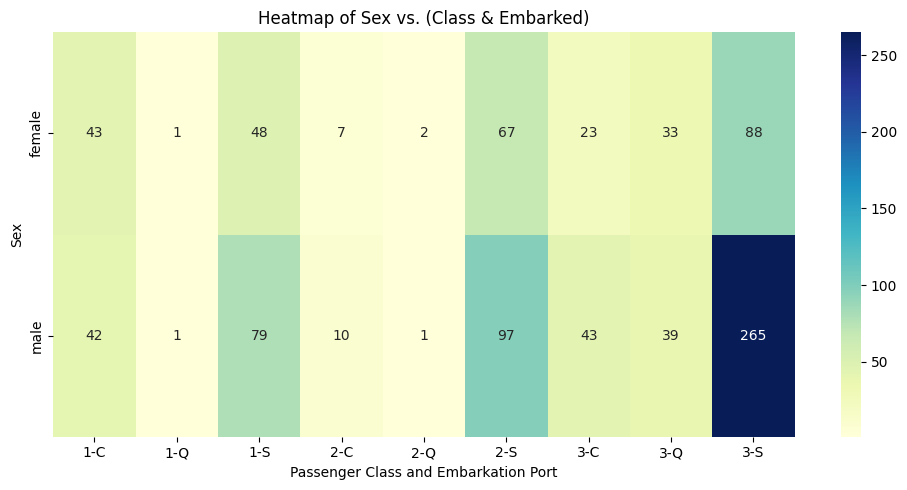

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# 3. Generate the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Sex vs. (Class & Embarked)')
plt.ylabel('Sex')
plt.xlabel('Passenger Class and Embarkation Port')
plt.tight_layout() # Adjusts plot for better readability
    
    # Save the plot to a file
plt.savefig('sample_crosstab_heatmap.png')
print("\nHeatmap 'sample_crosstab_heatmap.png' generated successfully.")